# A FAIRE et ensuite SUPPRIMER CE TRUC

- Faire une table avec les colonnes suivantes :

code_rome, libelle_rome, code_ogr_competence, libelle_ogr_competence, sous_cat_comp


- Valeurs manquantes :

Heatmap des NA pour la table.
Taux de NA (%) par colonne.


- Métiers (libelle_rome)

Nombre de métiers distincts (nunique).
Top 20 métiers : barplot horizontal.
Courbe cumulée (CDF des fréquences) : line plot.


- Compétences (libelle_competence)

Nombre de compétences distinctes.
Top 20 compétences : barplot horizontal.
Courbe cumulée des fréquences : line plot.


- Relations métiers-compétences

Nb de compétences par métier : tableau + barplot (Top 20).
Nb de métiers par compétence : tableau + barplot (Top 20).


- Vérifs de cohérence

Check doublons (metier, competence).
Check orphelins (codes non matchés).


- Récap chiffres clés

Tableau Markdown avec : Nb lignes total, Nb métiers, Nb compétences, Nb macro-compétences, Couverture 80/90/95%.


- Les sous-catégories

    - Comptage global :
Nb de sous-catégories distinctes (nunique).
Top 20 sous-catégories → barplot horizontal.

    - Richesse par métier :
Nb de sous-catégories différentes par métier (groupby("libelle_rome")["sous-cat"].nunique()).
Donne une idée de la diversité des familles de compétences d’un métier.

    - Transversalité par sous-catégorie :
Nb de métiers différents par sous-catégorie.
Permet d’identifier les sous-catégories partagées par beaucoup de métiers (transversales) vs. celles propres à un petit nombre (spécifiques).

    - Profil métier en sous-catégorie :
Pour chaque métier : distribution (% de ses compétences dans chaque sous-catégorie).
Ça devient quantitatif = exploitable en ML.

**A CORRIGER !!!**

# Projet : Prédiction des métiers à partir des compétences (Données ROME) 
## Objectif
L’objectif du projet est de construire un modèle de Machine Learning capable de **prédire un métier (code ROME)** à partir d’un ensemble de **compétences**.  
À terme, le modèle pourra suggérer un ou plusieurs métiers en fonction du profil de compétences observé.

---

## Données
Les données proviennent de trois fichiers ROME :
- `unix_arborescence_competences_v459_utf8.csv` : arborescence des compétences et macro-compétences,  
- `unix_coherence_item_v459_utf8.csv` : associations entre compétences et métiers,  
- `unix_referentiel_code_rome_v459_utf8.csv` : référentiel des métiers et codes ROME.  

Après fusion et nettoyage, le dataset final contient environ **20 937 lignes**.

---

## Rôle de l’EDA
Avant de préparer les données pour le Machine Learning, une **analyse exploratoire (EDA)** est indispensable pour :
- comprendre la structure du dataset,  
- identifier la cible et ses déséquilibres,  
- analyser la distribution des compétences et macro-compétences,  
- mettre en évidence les relations métiers ↔ compétences,  
- tirer les premières conclusions utiles au **prétraitement**.  

---

## Analyse de la forme
- **Cible identifiée** : `code_rome` (métier à prédire), avec son libellé `libelle_rome`.  
- **Nombre de lignes et colonnes** : après merge des trois tables : **20 937 lignes**.  
- **Types de variables** :
  - Numériques : uniquement des **codes** (identifiants ROME/OGR), pas de variables continues exploitables.  
  - Catégorielles : `libelle_rome`, `libelle_competence`, `libelle_macro_competence`.  
- **Valeurs manquantes** :
  - Vérification effectuée dans chaque table (`coherence_item`, `arborescence_competences`, `referentiel_rome`).  
  - Colonnes inutiles ou trop vides supprimées (`coeur_metier`, etc.).  
  - Suppression des lignes sans code OGR de compétence.  

---

## Analyse du fond

### Distribution de la cible (libelle_rome)
- Plusieurs centaines de métiers différents.  
- La cible est **très déséquilibrée** : quelques métiers dominent largement, beaucoup apparaissent très rarement.  
- La courbe cumulée montre une **long tail** : une minorité de métiers couvre la majorité des données.  

### Distribution des compétences (libelle_competence)
- **9 889 compétences distinctes**.  
- Certaines sont très fréquentes et présentes dans de nombreux métiers (**transversales**).  
- Beaucoup n’apparaissent que dans un ou quelques métiers (**spécifiques**).  

### Distribution des macro-compétences (libelle_macro_competence)
- **479 macro-compétences** identifiées.  
- Quelques familles dominent (ex. organisation, communication), d’autres sont marginales.  

### Relations métiers - compétences
- Nombre de **compétences par métier** : certains métiers sont complexes (très riches en compétences), d’autres plus spécialisés.  
- Nombre de **métiers par compétence** : certaines compétences sont transversales, d’autres discriminantes.  
- Croisements métier - macro-compétence mettent en évidence des familles très répandues et d’autres beaucoup plus ciblées.  

---

## Conclusion de l’EDA
- Le dataset est **entièrement catégoriel** (codes + libellés).  
- La cible (métiers) est **fortement déséquilibrée**.  
- Les compétences suivent une **long tail** :  
  - fréquentes : peu discriminantes,  
  - rares : très discriminantes mais sous-représentées.  
- Les macro-compétences présentent également un déséquilibre marqué.  

### Implications pour le ML
- **Encodage obligatoire** des variables catégorielles (one-hot ou embeddings).  
- **Gestion du déséquilibre** : sous-échantillonnage, oversampling, `class_weight`, ou métriques adaptées (balanced accuracy, F1-macro, top-k accuracy).  
- **Analyse de la spécificité vs transversalité** des compétences pour améliorer la qualité de prédiction.  

En résumé : le dataset est riche mais déséquilibré.  
La phase de **prétraitement** (encoding + équilibrage) sera cruciale avant d’entraîner un modèle de machine learning.  

---

## Remarque méthodologique
Le dataset ROME se compose uniquement de variables **catégorielles** : métiers, compétences, macro-compétences.  
Les colonnes numériques (`code_ogr`, `code_rome`) sont en fait des identifiants et ne portent pas d’information quantitative.  

Conséquence :  
- pas d’histogrammes ou de boxplots pertinents,  
- pas de corrélations continues à analyser,  
- l’EDA se concentre sur les **fréquences**, les **déséquilibres** et les **relations entre catégories**.  

Cela explique pourquoi l’EDA est plus sobre visuellement : elle est adaptée à la nature des données et met en avant les vrais enjeux pour le ML.

In [34]:
# Données utilisées depuis le Bucket S3:

# df_competence_rome_clean.csv

In [6]:
# Install specific libraries for Amazon S3 connection:
%pip install boto3
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io
import os
from dotenv import load_dotenv
import boto3

In [87]:
# Load environment variables with specific location depend on EDI (PyCharm/VSCode)
if not load_dotenv('../settings/.env'):
    print("Load env from alternative from path")
    load_dotenv('script/settings/.env')

# Check settings (for debug session only)
if __debug__:
    print('Debug ON')
    print("Environment data:", 
        "\nS3_ENDPOINT_URL:", os.getenv("S3_ENDPOINT_URL"),
        "\nS3_ACCESS_KEY_ID (len):", len(os.getenv("S3_ACCESS_KEY_ID")), "bytes",
        "\nS3_SECRET_ACCESS_KEY (len):", len(os.getenv("S3_SECRET_ACCESS_KEY")), "bytes",
        "\nS3_REGION:", os.getenv("S3_REGION")
        )

Debug ON
Environment data: 
S3_ENDPOINT_URL: https://bhckzdwrhhfaxbidmwpm.supabase.co/storage/v1/s3 
S3_ACCESS_KEY_ID (len): 32 bytes 
S3_SECRET_ACCESS_KEY (len): 64 bytes 
S3_REGION: eu-west-3


In [88]:
# Init S3 client 
try:
    s3_client = boto3.client(
        service_name='s3',
        region_name=os.getenv("S3_REGION"),
        endpoint_url=os.getenv("S3_ENDPOINT_URL"),
        aws_access_key_id=os.getenv("S3_ACCESS_KEY_ID"), 
        aws_secret_access_key=os.getenv("S3_SECRET_ACCESS_KEY")
    ) 
except Exception as ex:
    print(ex)

# Define function to read ROME CSV files
def read_ml_from_s3(s3_file_key):
    bucket_name = 'ML'
    s3_ml_path = ''

    try:
        obj = s3_client.get_object(Bucket= bucket_name, Key= s3_ml_path + s3_file_key)
        df = pd.read_csv(io.BytesIO(obj['Body'].read()))
        return df
    except Exception as ex:
        print("Erreur de lecture du fichier depuis le buecket S3:")
        print("->", ex)
    
    return None

# S3 CSV reading test
df = read_ml_from_s3( 'df_competence_rome_eda.csv')
if df is not None:
    print("Lecture du fichier réussi:")
    print(f"-> CSV: Nb de lignes: {df.shape[0]}, Nb de colonnes: {df.shape[1]}")

Lecture du fichier réussi:
-> CSV: Nb de lignes: 38961, Nb de colonnes: 13


In [89]:
# On récupère les données qui nous seront utiles
file_path_name = 'df_competence_rome_eda.csv'

try:
    df = read_ml_from_s3( file_path_name)
    print(f"Arborescence: Nb de lignes: {df.shape[0]}, Nb de colonnes: {df.shape[1]}")
except:
    print('Erreur lors de la lecture du fichier!')

Arborescence: Nb de lignes: 38961, Nb de colonnes: 13


In [90]:
# Modification des paramèters d'affichage de Pandas:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

## Analyse de la forme

In [44]:
# Identification de la cible du fichier referentiel_code_rome
df.head(20)

,Unnamed: 0,code_rome,libelle_rome,code_ogr_competence,libelle_competence,sous_cat_comp,libelle_macro_competence
0,0,A1101,Conducteur / Conductrice d'engins agricoles,104016,Contrôler le fonctionnement d'un dispositif de...,Technique expert,"Contrôler le fonctionnement d'un équipement, d..."
1,1,A1101,Conducteur / Conductrice d'engins agricoles,107141,Entretenir les mécanismes d'un engin motorisé,Technique,"Entretenir un équipement, une machine, une ins..."
2,2,A1101,Conducteur / Conductrice d'engins agricoles,110024,Conduire un poids lourd,Technique,Conduire un véhicule routier
3,3,A1101,Conducteur / Conductrice d'engins agricoles,117548,Stocker un produit,Technique,"Trier, ranger des produits, des matières premi..."
4,4,A1101,Conducteur / Conductrice d'engins agricoles,122567,Débroussailler une plantation et ses chemins d...,Technique,"Aménager, entretenir un espace naturel, une forêt"
5,5,A1101,Conducteur / Conductrice d'engins agricoles,122568,Contrôler l'état d'une plantation,Technique,"Aménager, entretenir un espace naturel, une forêt"
6,6,A1101,Conducteur / Conductrice d'engins agricoles,122573,"Planifier une opération de semis, de traitemen...",Technique expert,Elaborer et planifier un programme de producti...
7,7,A1101,Conducteur / Conductrice d'engins agricoles,122730,"Préparer les sols, les plantations (épandage, ...",Technique,Cultiver et récolter des végétaux / minéraux
8,8,A1101,Conducteur / Conductrice d'engins agricoles,122817,Réaliser des travaux d'aménagement,Technique,"Aménager, entretenir un espace naturel, une forêt"
9,9,A1101,Conducteur / Conductrice d'engins agricoles,122853,Récolter un produit à maturité et selon les co...,Technique,Cultiver et récolter des végétaux / minéraux


In [45]:
# Visualisation des types de données
df.dtypes

Unnamed: 0                   int64
code_rome                   object
libelle_rome                object
code_ogr_competence          int64
libelle_competence          object
sous_cat_comp               object
libelle_macro_competence    object
dtype: object

In [46]:
# Types de variables
df.dtypes.value_counts()

object    5
int64     2
Name: count, dtype: int64

<Axes: >

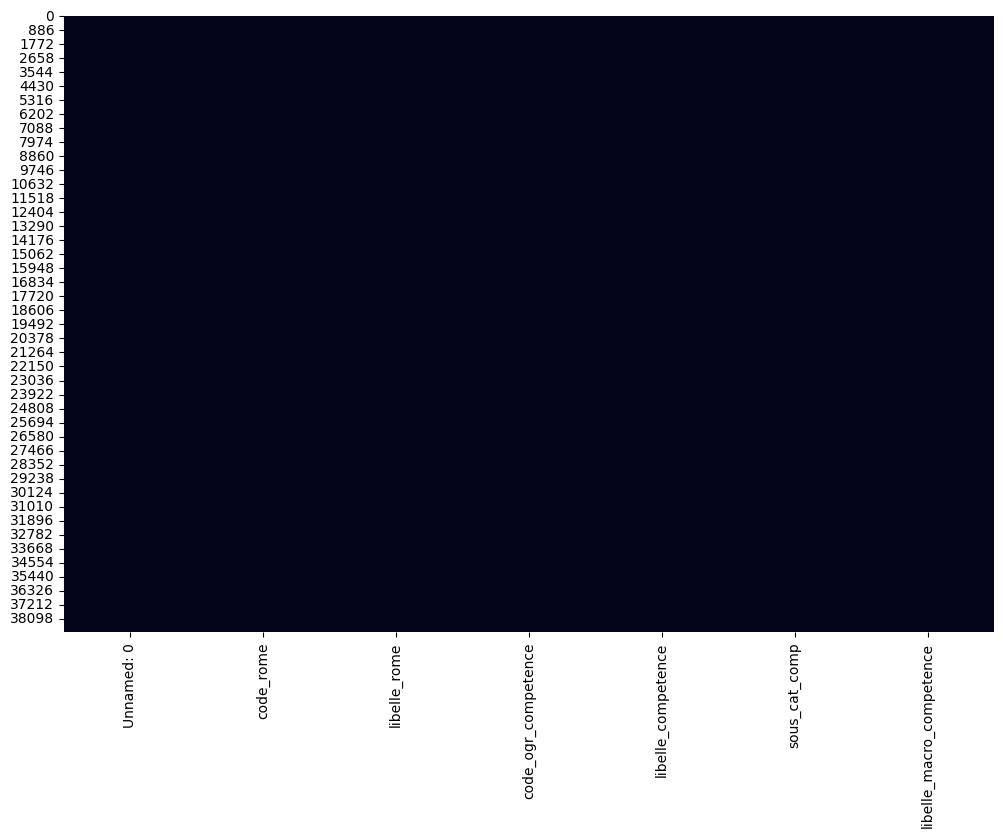

In [49]:
# Identification des valeurs manquantes pour coherence:
# Utilisation de heatmap et isna:
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), cbar= False)

In [50]:
# Taux de valeur nulles pour coherence:
(df.isna().sum()/df.shape[0]).sort_values(ascending= True)

Unnamed: 0                  0.0
code_rome                   0.0
libelle_rome                0.0
code_ogr_competence         0.0
libelle_competence          0.0
sous_cat_comp               0.0
libelle_macro_competence    0.0
dtype: float64

In [51]:
# On supprime la colonne inutile:
df.drop(columns='Unnamed: 0', axis=0, inplace=True)
df.shape

(38961, 6)

In [52]:
# Affichage des code OGR competence NULL:
df[df['code_ogr_competence'].isna()]

,code_rome,libelle_rome,code_ogr_competence,libelle_competence,sous_cat_comp,libelle_macro_competence


# Examen de la colonne target

In [ ]:
df['code_rome'].value_counts()

code_rome
K2125    82
I1610    72
D1509    66
K2133    66
K1414    64
         ..
H1516     5
N2205     5
K1403     5
C1104     5
C1401     5
Name: count, Length: 1584, dtype: int64

In [ ]:
# Vérification du contenu :
df[df['code_rome'] == 'K2125']

,code_rome,libelle_rome,code_ogr_competence,libelle_competence,sous_cat_comp,libelle_macro_competence
28407,K2125,Archéologue,100486,Déterminer les contraintes techniques de l'oeu...,Technique,Réaliser une étude d'opportunité et de faisabi...
28408,K2125,Archéologue,108520,"Diriger des travaux de recherche (thèse, mémoi...",Technique expert,Conduire des travaux d'études et de recherche
28409,K2125,Archéologue,108521,Conseiller et apporter un appui technique aux ...,Technique expert,Accompagner l'élaboration et la mise en oeuvre...
28410,K2125,Archéologue,108783,"Définir les thèmes, l'objet et la finalité d'é...",Technique expert,"Mettre en oeuvre une stratégie, un plan d'actions"
28411,K2125,Archéologue,108784,Déterminer et développer les méthodes de reche...,Technique expert,Définir et faire évoluer des procédés de trait...
28412,K2125,Archéologue,108787,Etablir un rapport d'étude ou de recherche,Technique expert,Conduire des travaux d'études et de recherche
28413,K2125,Archéologue,108788,Présenter et expliciter les avancées scientifi...,Transverse,Mettre en oeuvre des actions de communication
28414,K2125,Archéologue,115287,Présider ou participer à un jury d'examen,Technique expert,"Evaluer des acquis d'apprentissage, de formati..."
28415,K2125,Archéologue,115350,"Concevoir et coordonner un programme, un proje...",Technique expert,Conduire des travaux d'études et de recherche
28416,K2125,Archéologue,120206,Réaliser une recherche documentaire,Transverse,Réaliser une veille documentaire


In [56]:
df['code_rome'].value_counts(normalize= True)

code_rome
K2125    0.002105
I1610    0.001848
D1509    0.001694
K2133    0.001694
K1414    0.001643
           ...   
H1516    0.000128
N2205    0.000128
K1403    0.000128
C1104    0.000128
C1401    0.000128
Name: proportion, Length: 1584, dtype: float64

# Analyse des variables

In [58]:
# Vue d'ensemble
print("Shape:", df.shape)
print(df.dtypes.value_counts(), "\n")

Shape: (38961, 6)
object    5
int64     1
Name: count, dtype: int64 



In [59]:
df.groupby("libelle_competence")["libelle_rome"].nunique().sort_values(ascending=False).head(20)

libelle_competence
Assurer la gestion administrative d'une activité                                  177
Définir des besoins en approvisionnement                                          123
Assurer le suivi des stocks en temps réel                                          93
Effectuer la maintenance de premier niveau des outillages et des équipements       92
Organiser et planifier une activité                                                78
Favoriser un environnement de travail collaboratif                                 73
Réaliser une intervention nécessitant une habilitation                             61
Gérer des situations de crise ou d'urgence                                         60
Collaborer avec des équipes multidisciplinaires                                    54
Représenter sa structure lors d'un événement ou auprès d'instances de décision     51
Intégrer l'éco-responsabilité dans toutes les dimensions de son activité           50
Procéder à l'encaissement          

In [60]:
df.groupby("libelle_rome")["libelle_competence"].nunique().sort_values(ascending=False).head(20)

libelle_rome
Archéologue                                                82
Responsable atelier carrosserie                            72
Responsable de département en grande distribution          66
Sociologue                                                 66
Chargé / Chargée de mission santé publique                 64
Ethnologue                                                 63
Démographe                                                 62
Mécanicien / Mécanicienne cycles                           62
Directeur / Directrice de l'environnement de travail       60
Chef / Cheffe de centre des impôts                         59
Assistant commercial / Assistante commerciale              58
Styliste                                                   57
Chef / Cheffe de chantier travaux publics                  56
Chargé / Chargée de mission eaux pluviales                 55
Coordinateur / Coordinatrice pédagogique                   55
Secrétaire général / Secrétaire générale                 

In [61]:
df.groupby("libelle_macro_competence")["libelle_rome"].nunique().sort_values(ascending=False).head(20)

libelle_macro_competence
Evaluer, prévenir, et gérer les risques et la sécurité                                450
Rédiger un rapport, un compte rendu d'activité                                        354
Gérer les stocks                                                                      351
Définir et mettre en oeuvre des protocoles de sécurité                                351
Respecter les règles de Qualité, Hygiène, Sécurité, Santé et Environnement (QHSSE)    309
Communiquer à l'oral en milieu professionnel                                          304
Gérer une situation d'urgence                                                         284
Réduire l'empreinte environnementale de son activité                                  279
Développer et piloter un réseau d'organisations partenaires                           273
Réaliser une opération de maintenance                                                 272
Respecter des règles, des consignes, normes et procédures opérationnelles  

### Ce que l'on peut en déduire:
### -> Il faut faire un trie supplémentaire sur les compétences car il y a une sur-représentation de certaines dans les code ROME (métier).
---

(A refaire/compléter)
# Analyse des variables Qualitatives

Dans ce dataset, les variables importantes sont toutes **catégorielles** :  
- `libelle_rome` : métiers (cible de notre prédiction)  
- `libelle_competence` : compétences détaillées  
- `libelle_macro_competence` : familles de compétences  

---

### Distribution de la cible (libelle_rome)
Objectif : vérifier combien de métiers différents sont représentés et observer leur fréquence.  
Cela permet de détecter le **déséquilibre de la cible** (certains métiers très fréquents, beaucoup de métiers rares).

### Distribution des compétences (libelle_competence)
Objectif : identifier les compétences les plus fréquentes (transversales) et celles qui apparaissent rarement (spécifiques).

### Distribution des macro-compétences (libelle_macro_competence)
Objectif : observer quelles familles de compétences dominent dans le dataset.

### Relations métiers ↔ compétences
Objectif : comprendre la richesse et la transversalité :
- combien de compétences différentes par métier,  
- combien de métiers différents par compétence,  
- quels liens forts existent entre métiers et macro-compétences.  

---

### Conclusion intermédiaire
- Toutes les variables sont qualitatives, aucun continu.  
- La cible (métiers) est fortement déséquilibrée.  
- Certaines compétences sont très fréquentes (transversales, peu discriminantes), d’autres rares (spécifiques).  
- Ces constats guideront le prétraitement pour le ML :
  - encodage des variables catégorielles,  
  - gestion du déséquilibre de la cible,  
  - métriques adaptées (balanced accuracy, top-k accuracy).

Nombre de métiers différents : 1584


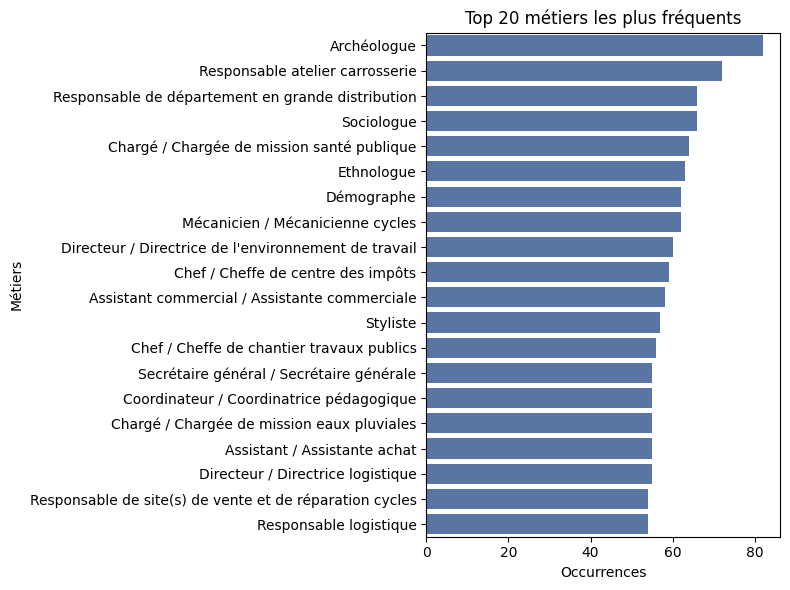

In [62]:
# --- Distribution de la cible (métiers) ---
vc_jobs = df["libelle_rome"].value_counts()
print("Nombre de métiers différents :", vc_jobs.shape[0])
vc_jobs.head(20)

plt.figure(figsize=(8,6))
sns.barplot(x=vc_jobs.head(20).values, y=vc_jobs.head(20).index, color="#4C72B0")
plt.title("Top 20 métiers les plus fréquents")
plt.xlabel("Occurrences")
plt.ylabel("Métiers")
plt.tight_layout()
plt.show()

Nombre de compétences différentes : 16583


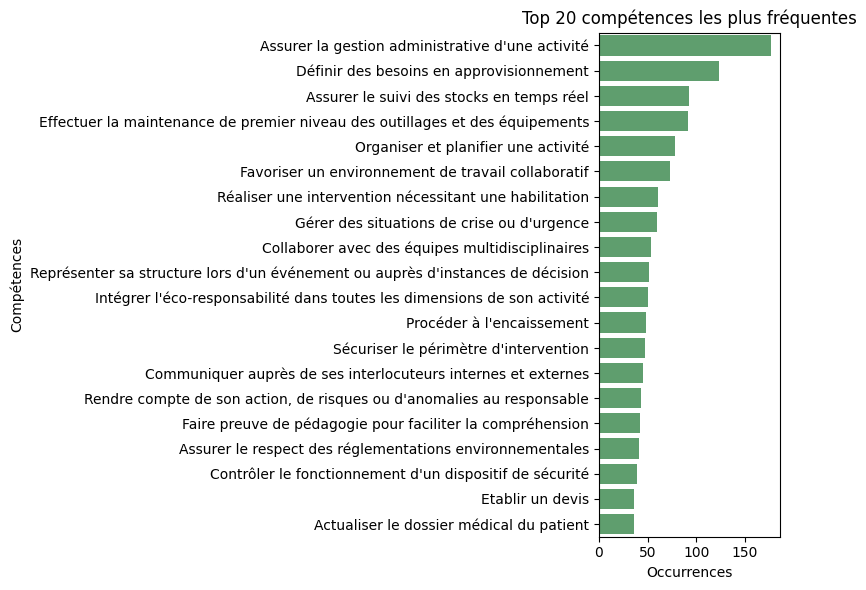

In [64]:
# --- Distribution des compétences ---
vc_comp = df["libelle_competence"].value_counts()
print("Nombre de compétences différentes :", vc_comp.shape[0])
vc_comp.head(20)

plt.figure(figsize=(8,6))
sns.barplot(x=vc_comp.head(20).values, y=vc_comp.head(20).index, color="#55A868")
plt.title("Top 20 compétences les plus fréquentes")
plt.xlabel("Occurrences")
plt.ylabel("Compétences")
plt.tight_layout()
plt.show()

Nombre de macro-compétences : 487


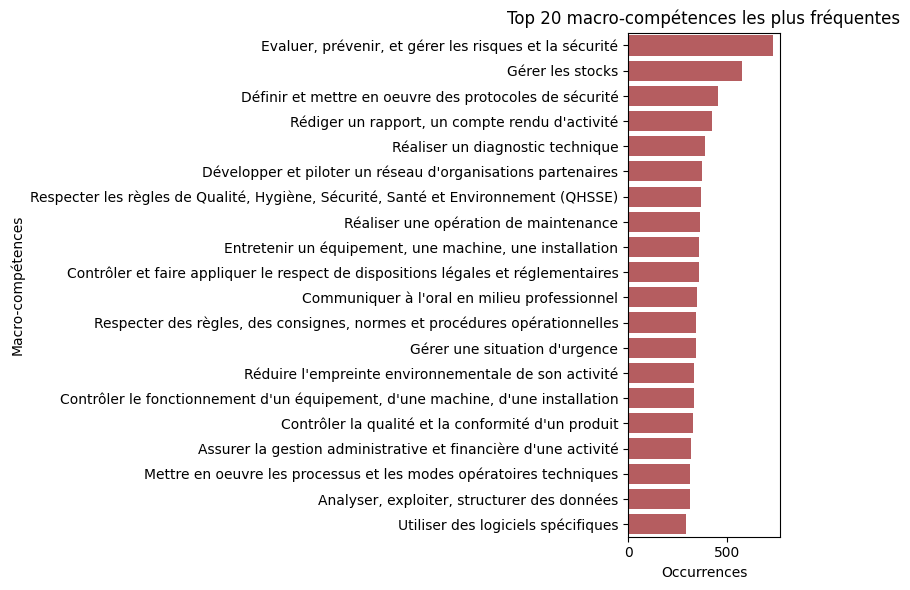

In [65]:
# --- Distribution des macro-compétences ---
vc_macro = df["libelle_macro_competence"].value_counts()
print("Nombre de macro-compétences :", vc_macro.shape[0])

# On garde seulement les 20 plus fréquentes
top_macro = vc_macro.head(20)

plt.figure(figsize=(8,6))
sns.barplot(x=top_macro.values, y=top_macro.index, color="#C44E52")
plt.title("Top 20 macro-compétences les plus fréquentes")
plt.xlabel("Occurrences")
plt.ylabel("Macro-compétences")
plt.tight_layout()
plt.show()

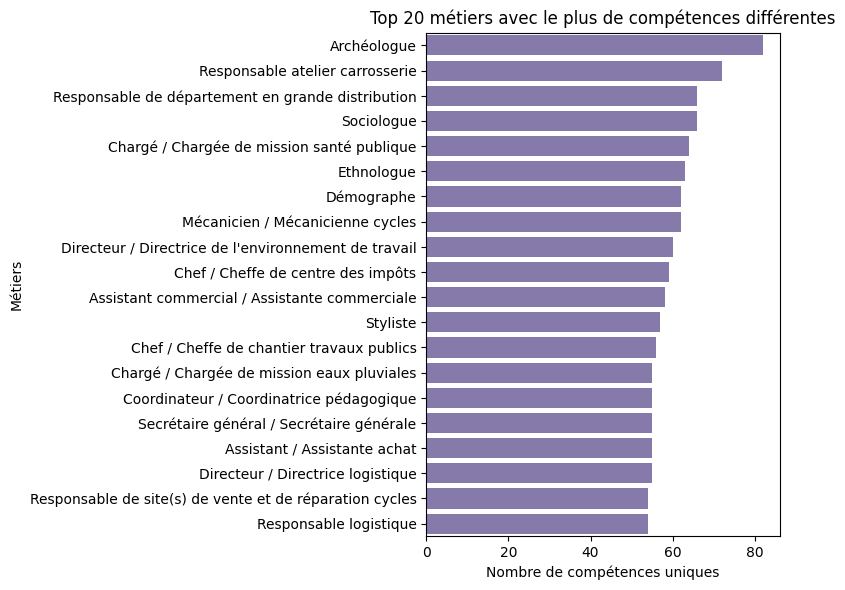

In [66]:
# --- Nb de compétences par métier ---
skills_per_job = df.groupby("libelle_rome")["libelle_competence"].nunique().sort_values(ascending=False)
skills_per_job.head(20)

plt.figure(figsize=(8,6))
sns.barplot(x=skills_per_job.head(20).values, y=skills_per_job.head(20).index, color="#8172B2")
plt.title("Top 20 métiers avec le plus de compétences différentes")
plt.xlabel("Nombre de compétences uniques")
plt.ylabel("Métiers")
plt.tight_layout()
plt.show()

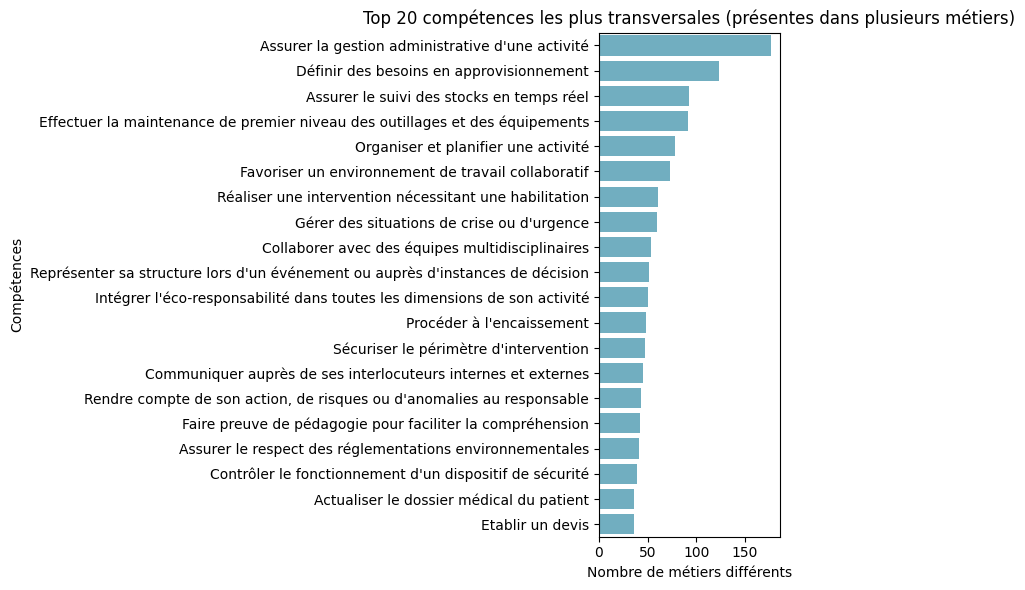

In [67]:
# --- Nb de métiers par compétence ---
jobs_per_skill = df.groupby("libelle_competence")["libelle_rome"].nunique().sort_values(ascending=False)
jobs_per_skill.head(20)

plt.figure(figsize=(8,6))
sns.barplot(x=jobs_per_skill.head(20).values, y=jobs_per_skill.head(20).index, color="#64B5CD")
plt.title("Top 20 compétences les plus transversales (présentes dans plusieurs métiers)")
plt.xlabel("Nombre de métiers différents")
plt.ylabel("Compétences")
plt.tight_layout()
plt.show()

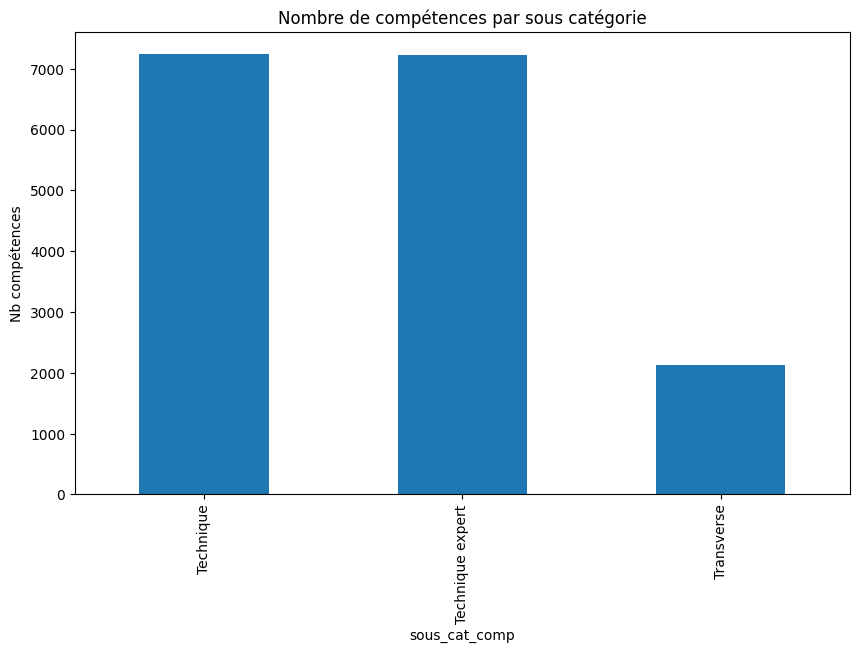

In [80]:
# Compter le nombre de compétences sous-cat
comp_par_sous_cat = (
    df.groupby(["sous_cat_comp"])["libelle_competence"]
    .nunique()
    .sort_index()
)

# Graphique 3 : par sous-catégorie
comp_par_sous_cat.plot(
    kind="bar", figsize=(10,6), title="Nombre de compétences par sous catégorie"
)
plt.ylabel("Nb compétences")
plt.show()

In [81]:
df.groupby(["sous_cat_comp"])["libelle_competence"].count()


sous_cat_comp
Technique           16507
Technique expert    16666
Transverse           5788
Name: libelle_competence, dtype: int64

In [ ]:
# 
df.groupby(["libelle_rome"])["sous_cat_comp"].nunique().sort_index()

# -> Faire la matrice libelle_rome / sous catégorie

np.int64(1584)